# Exercício 7 - Visão Computacional
## Tomás Ferranti
## Prof. Moacyr Alvim Horta Barbosa da Silva

Este notebook se encontra atualizado no link do [GitHub](https://github.com/TomasFerranti/ComputerVisionCourse/tree/main/Exercicio7) juntamente com os pacotes necessários para executá-lo.

In [1]:
import os
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam
import tensorflow_hub as hub

2023-06-08 19:10:56.162490: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 19:10:56.422793: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-08 19:10:56.424368: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-08 19:10:58.420625: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


### Questão 1

Para a questão 1 precisamos apenas carregar o conjunto de dados e normalizar para $[0,1]$, dado que o próprio conjunto já está separado 5/6 para treino e 1/6 para teste.

In [2]:
# Questao 1
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype("float") / 255.0
x_test = x_test.astype("float") / 255.0

classes = ['Avião', 'Carro', 'Pássaro', 'Gato', 'Cervo', 'Cachorro', 'Sapo', 'Cavalo', 'Navio', 'Caminhão']

### Questão 2

Para a questão 1 precisamos definir as camadas do nosso modelo sequencial e compilar com os parâmetros de otimização de acordo com o enunciado.

In [3]:
# Questao 2
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 13, 13, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 16)          2

2023-06-08 19:11:10.241177: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:266] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


### Questão 3

Para a questão 3 podemos usar uma função do tensorflow chamada to_categorical() para realizar onehotencoding na predição. Após isso, podemos treinar o nosso modelo nos dados e avaliar a performance dele no teste. Este modelo em questão atingiu 67% de acurácia.

Como o modelo demora um pouco para treinar, é aconselhável criar uma pasta para salvar/carregar ele, incluída na próxima célula de código após treinamento.

In [4]:
# Questao 3
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_test, y_test))
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

2023-06-05 23:50:54.816501: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


Epoch 1/10
  2/782 [..............................] - ETA: 1:21 - loss: 2.2922 - accuracy: 0.1797 

2023-06-05 23:50:56.942309: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27451008 exceeds 10% of free system memory.
2023-06-05 23:50:56.942384: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27451008 exceeds 10% of free system memory.
2023-06-05 23:50:56.959261: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27993600 exceeds 10% of free system memory.
2023-06-05 23:50:56.959332: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 27993600 exceeds 10% of free system memory.


782/782 [==============================] - 74s 92ms/step - loss: 1.5933 - accuracy: 0.4184 - val_loss: 1.4138 - val_accuracy: 0.4806
Epoch 2/10
782/782 [==============================] - 71s 91ms/step - loss: 1.2811 - accuracy: 0.5430 - val_loss: 1.1962 - val_accuracy: 0.5711
Epoch 3/10
782/782 [==============================] - 71s 91ms/step - loss: 1.1241 - accuracy: 0.6013 - val_loss: 1.1288 - val_accuracy: 0.5922
Epoch 4/10
782/782 [==============================] - 71s 91ms/step - loss: 1.0228 - accuracy: 0.6396 - val_loss: 1.0308 - val_accuracy: 0.6369
Epoch 5/10
782/782 [==============================] - 71s 91ms/step - loss: 0.9397 - accuracy: 0.6670 - val_loss: 0.9732 - val_accuracy: 0.6549
Epoch 6/10
782/782 [==============================] - 71s 91ms/step - loss: 0.8693 - accuracy: 0.6916 - val_loss: 0.9773 - val_accuracy: 0.6541
Epoch 7/10
782/782 [==============================] - 71s 91ms/step - loss: 0.8113 - accuracy: 0.7149 - val_loss: 0.8977 - val_accuracy: 0.6894
Epo

In [4]:
if os.path.exists("cache/model1"):
    model = load_model("cache/model1")
else:
    model.save('cache/model1')

### Questão 4

Iremos usar a imagem fornecida chamada "Imagem_32x32.png". Nela temos uma foto de um cachorro. Infelizmente o modelo atribuiu maior probabilidade à classe Gato, seguida por avião e depois cachorro.

1/1 [==============================] - 0s 241ms/step
Previsoes: {'Avião': 0.28, 'Carro': 0.0, 'Pássaro': 0.05, 'Gato': 0.42, 'Cervo': 0.0, 'Cachorro': 0.1, 'Sapo': 0.0, 'Cavalo': 0.04, 'Navio': 0.0, 'Caminhão': 0.1}
Classe prevista: Gato


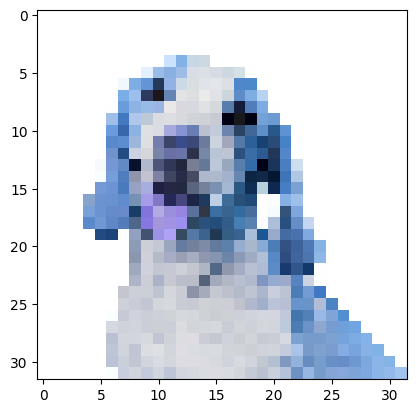

In [5]:
# Questao 4
im_nova = cv.imread("content/Imagem_32x32.png")
im_normalizado = im_nova / 255.0
nova_entrada = np.expand_dims(im_normalizado, axis=0)
previsoes = model.predict(nova_entrada).ravel()
predicted_class = np.argmax(previsoes)

dic = {classe:np.round(previsoes[i], 2) for i, classe in enumerate(classes)}
print(f"Previsoes: {dic}")
print(f"Classe prevista: {classes[predicted_class]}")

plt.imshow(im_nova)
plt.show()

### Questão 5

Podemos visualizar os $32$ primeiros filtros de convolução dessa rede como um mapa de calor com valor $0$ sendo preto e $255$ completamente branco. Abaixo seguem os padrões encontrados para esta rede para cada filtro. Podemos observar que esses filtros são bem diferentes um do outro, dando a entender que a complexidade para a extração de features em classificação necessita de uma variedade de filtros diferentes.

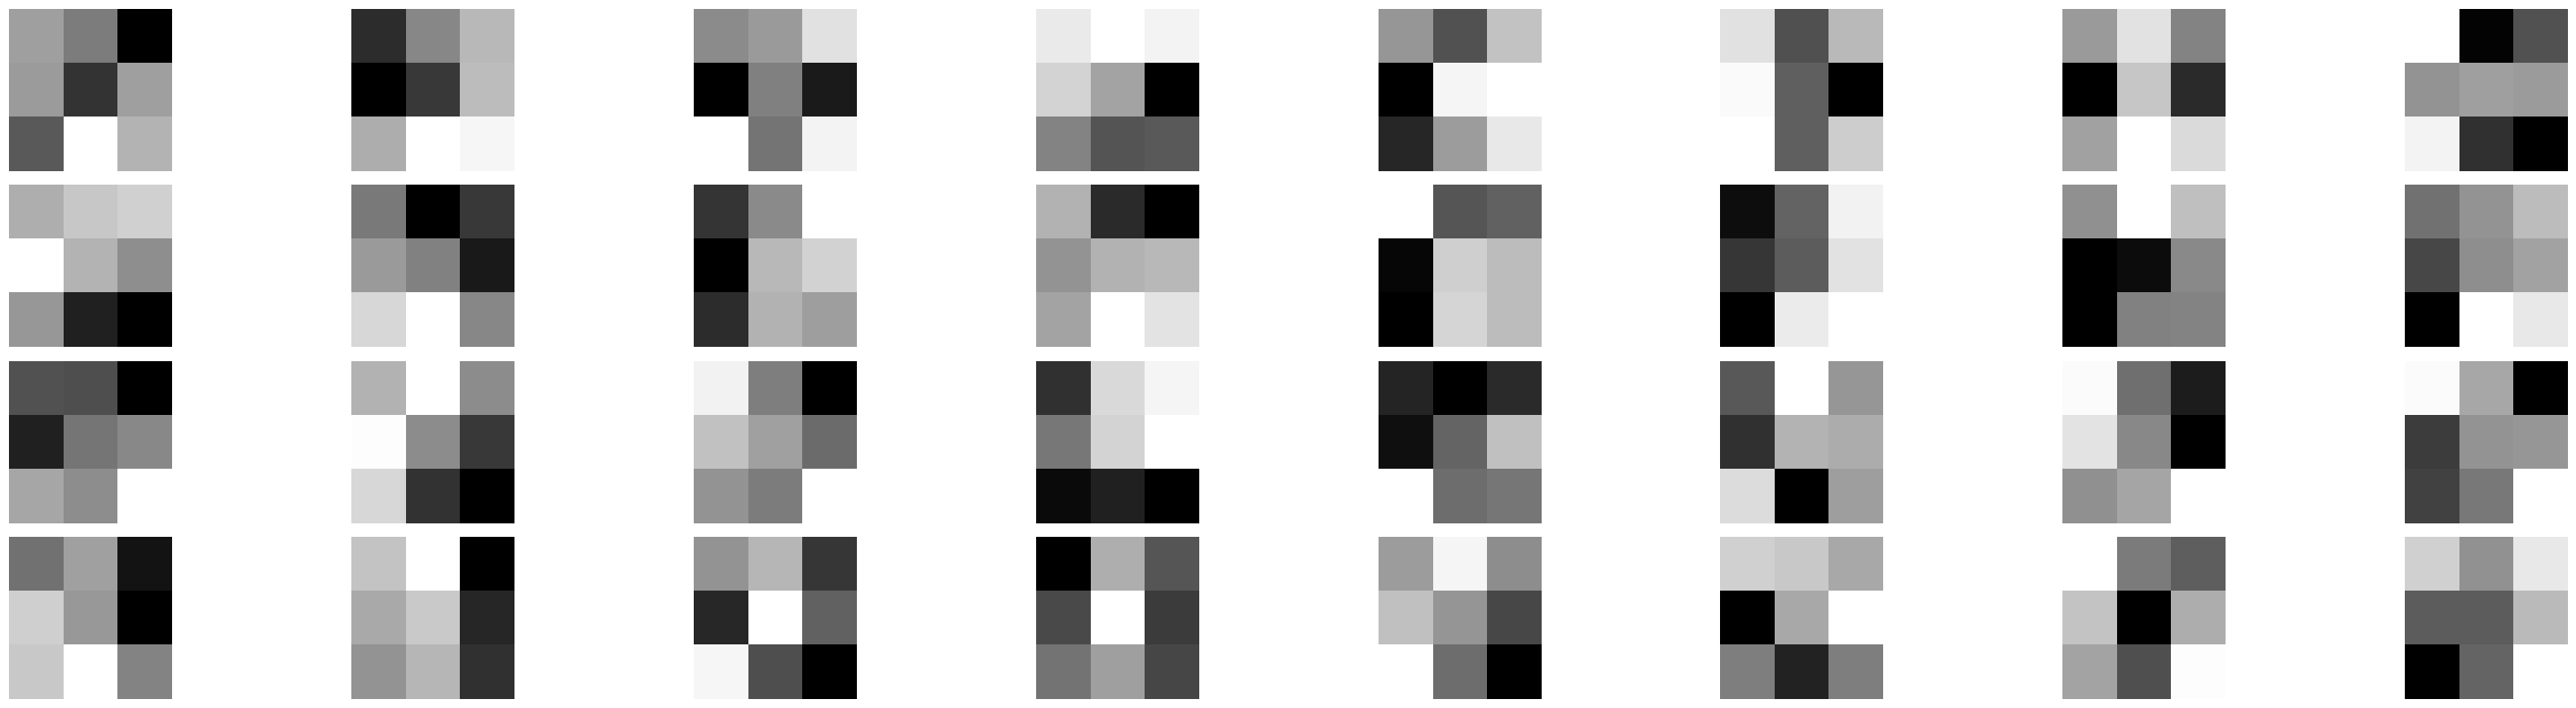

In [6]:
# Questao 5
pesos_primeira_camada = model.layers[0].get_weights()[0]

# Normalização dos pesos para valores entre 0 e 255
pesos_normalizados = (pesos_primeira_camada - np.min(pesos_primeira_camada)) / (np.max(pesos_primeira_camada) - np.min(pesos_primeira_camada))
pesos_normalizados *= 255

num_linhas = 4
num_colunas = 8
# Cria a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(32, 8))

# Percorre as imagens e exibe em cada subplot
for i in range(32):
    ax = axs[i // num_colunas, i % num_colunas]  # obtém o subplot correto
    filtro = pesos_normalizados[:, :, :, i]
    filtro_img = np.reshape(filtro, (3, 3, 3))
    # imagem em tons de cinza
    filtro_pb = cv.cvtColor(filtro_img, cv.COLOR_BGR2GRAY)
    filtro_pb = filtro_pb.astype(np.uint8)
    ax.imshow(filtro_pb, cmap='gray')  # exibe a imagem
    ax.axis('off')  # remove os eixos

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe a figura
plt.show()

### Questão 6

A minha rede de escolha para carregar e testar foi a do link "https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1". Podemos usar ela diretamente através do hub integrado do tensorflow. 

Esta rede neural profunda segue o estilo VGG treinada no conjunto de dados CIFAR-10. O modelo possui $11$ camadas convolucionais com aumento no número de canais, seguidas por uma camada de pooling médio na qual é aplicada uma camada linear para obter $10$ logits softmax. O modelo utiliza BatchNorm e foi treinado em remendos aleatórios de dados recortados de $24\times24$. Após o recorte, o aumento de dados foi realizado através da função tf.image.random_flip_left_right. Usaram um otimizador baseado em momentum com valor de $0.9$. Foi utilizado um cronograma de aprendizado decrescente, começando com $0.1$ e decaindo por um fator multiplicativo de $0.1$ a cada $10^3$ épocas. O batch size usado foi de $32$.

Podemos ver que ela supera consideravelmente a performance da rede anterior, atingindo um valor de acurácia de incríveis $94%$ comparados ao $67%$ anteriores. Para os filtros podemos pensar na mesma análise da questão anterior.

In [7]:
# Questao 6
hub_layer = hub.KerasLayer("https://tfhub.dev/deepmind/ganeval-cifar10-convnet/1", 
                           input_shape=(32, 32, 3), 
                           trainable=False)
model2 = tf.keras.Sequential([hub_layer])
model2.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(learning_rate=0.001))
loss, accuracy = model2.evaluate(x_test, y_test)
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')

313/313 [==============================] - 66s 209ms/step - loss: 1.0982 - accuracy: 0.9452
Test Loss: 1.0982
Test Accuracy: 0.9452


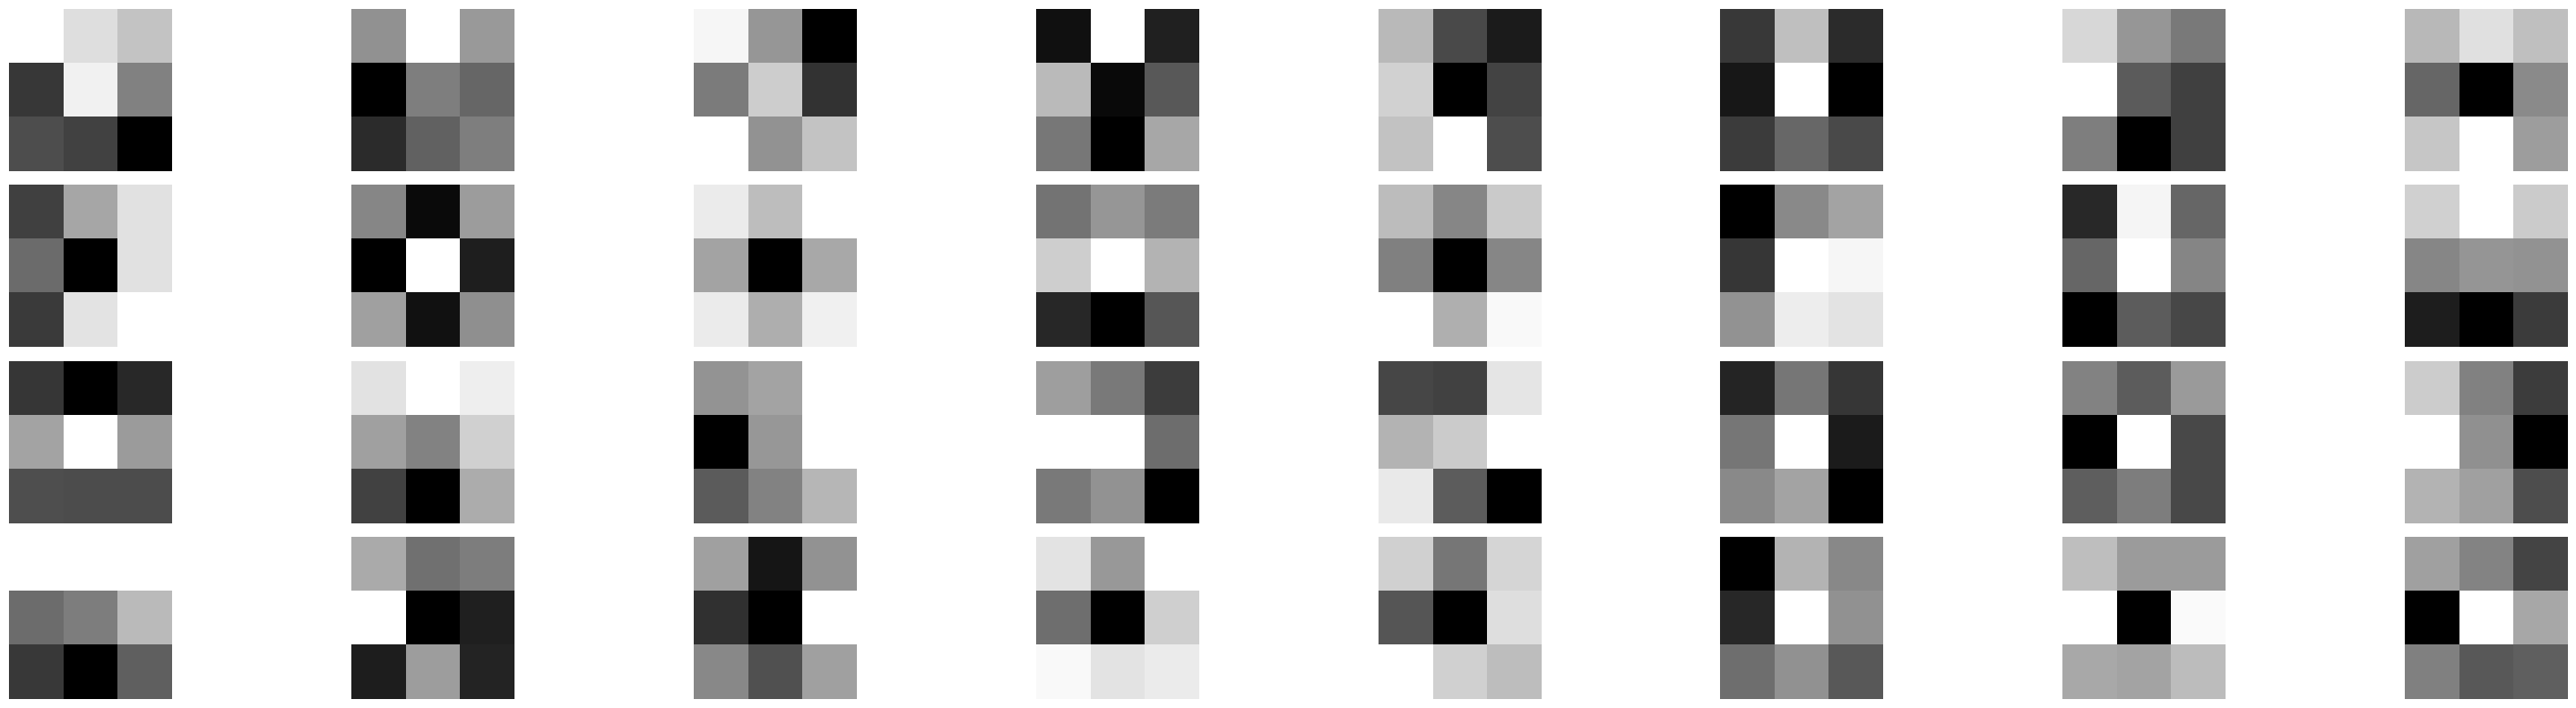

In [12]:
pesos_primeira_camada2 = model2.layers[0].get_weights()[0]

# Normalização dos pesos para valores entre 0 e 255
pesos_normalizados2 = (pesos_primeira_camada2 - np.min(pesos_primeira_camada2)) / (np.max(pesos_primeira_camada2) - np.min(pesos_primeira_camada2))
pesos_normalizados2 *= 255

num_linhas = 4
num_colunas = 8
# Cria a figura e os subplots
fig, axs = plt.subplots(num_linhas, num_colunas, figsize=(32, 8))

# Percorre as imagens e exibe em cada subplot
for i in range(32):
    ax = axs[i // num_colunas, i % num_colunas]  # obtém o subplot correto
    filtro = pesos_normalizados2[:, :, :, i]
    filtro_img = np.reshape(filtro, (3, 3, 3))
    # imagem em tons de cinza
    filtro_pb = cv.cvtColor(filtro_img, cv.COLOR_BGR2GRAY)
    filtro_pb = filtro_pb.astype(np.uint8)
    ax.imshow(filtro_pb, cmap='gray')  # exibe a imagem
    ax.axis('off')  # remove os eixos

# Ajusta o espaçamento entre os subplots
plt.tight_layout()

# Exibe a figura
plt.show()